In [1]:
import tensorflow as tf 
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [2]:
print(tf.__version__)

2.1.0


In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

In [4]:
# Because the class names are not included in the dataset, we need to name them ourself
# will help while plotting 
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
!pip install matplotlib

In [6]:
import matplotlib.pyplot as plt

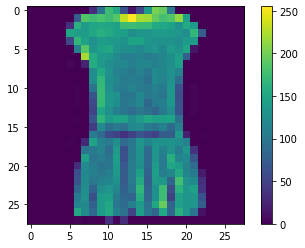

In [7]:
plt.figure()
plt.imshow(train_x[3])
plt.colorbar()
plt.grid(False)
plt.show()


In [8]:
train_x = train_x /255.0
test_x = test_x /255.0

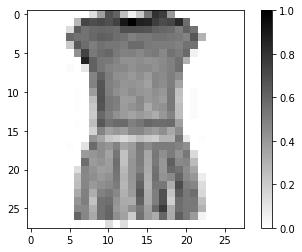

In [9]:
plt.figure()
plt.imshow(train_x[3], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()


In [10]:
from tensorflow.keras.layers import Flatten, Dense, Softmax
from tensorflow.keras.models import Sequential

In [11]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'), 
    Dense(10)
])

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
model.fit(train_x, train_y, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.5000 - accuracy: 0.8231
Epoch 2/10
60000/60000 [==============================] - 3s 42us/sample - loss: 0.3773 - accuracy: 0.8633
Epoch 3/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.3371 - accuracy: 0.8764
Epoch 4/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.3130 - accuracy: 0.8849
Epoch 5/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.2948 - accuracy: 0.8920
Epoch 6/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2804 - accuracy: 0.8956
Epoch 7/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.2681 - accuracy: 0.9000
Epoch 8/10
60000/60000 [==============================] - 5s 75us/sample - loss: 0.2572 - accuracy: 0.9046
Epoch 9/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.2486 - accuracy: 0.9063
Epoch 10/10
60

In [15]:
test_loss, test_acc = model.evaluate(test_x,  test_y, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 0.3387 - accuracy: 0.8794

Test accuracy: 0.8794


In [16]:
probability_model = Sequential([model, 
                                Softmax()])

In [18]:
predictions = probability_model.predict(test_x)

In [19]:
predictions[0]


array([3.5871313e-11, 1.2536489e-11, 2.5723718e-13, 5.8553450e-14,
       4.8731874e-13, 6.5111637e-04, 4.1441160e-11, 4.5108199e-03,
       2.5074293e-10, 9.9483806e-01], dtype=float32)